# Project : Case Study Investment 

# Link of Dataset: https://drive.google.com/file/d/1HrgsnewhusuF1S9nU67qMyjqSTeB6xmF/view?usp=sharing

# Question 1 - Number of Fundings

## Check the trend of investments over the years. To check the trend, find -
## Total number of fundings done in each year.
## Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.
## Print year-wise total number of fundings also. Print years in ascending order.

# Answer 1

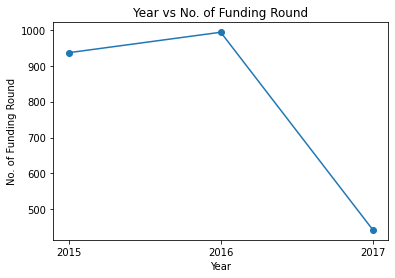

2015 936
2016 993
2017 443


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
df_start=pd.read_csv('C:\\Users\\lokes\\Downloads\\startup_funding.csv',encoding='utf-8') 

df_start['Date'].replace("12/05.2015","12/05/2015",inplace=True) 
df_start['Date'].replace("13/04.2015","13/04/2015",inplace=True) 
df_start['Date'].replace("15/01.2015","15/01/2015",inplace=True) 
df_start['Date'].replace("22/01//2015","22/01/2015",inplace=True) 

def convertDate(date): 
    return date.split('/')[-1] 
df_start['Year']=df_start['Date'].apply(convertDate) 
year_count=df_start['Year'].value_counts() 
year_fund=list(zip(year_count.index,year_count.values)) 
year_fund=np.array(year_fund,dtype=int) 
year_fund=year_fund[year_fund[:,0].argsort()] 
year=year_fund[:,0] 
funding_round=year_fund[:,1] 
plt.plot(year,funding_round,marker = 'o') 
plt.xticks(year) 
plt.title('Year vs No. of Funding Round')
plt.xlabel('Year') 
plt.ylabel('No. of Funding Round') 
plt.show() 
for i in range(len(year)): 
    print(year[i],funding_round[i])

# Question 2 - Top Indian Cities

## Find out which cities are generally chosen for starting a startup.
## Find top 10 Indian cities which have most number of startups ?
## Plot a pie chart and visualise it.
## Print the city name and number of startups in that city also.

# Answer 2

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


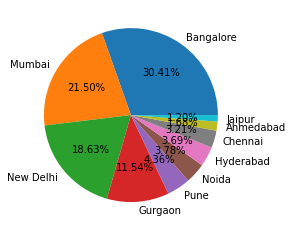

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("C:\\Users\\lokes\\Downloads\\startup_funding.csv",skipinitialspace=True)
data.head()

data['CityLocation'].dropna(inplace=True)

data.CityLocation.replace("bangalore","Bangalore",inplace=True)
data.CityLocation.replace("Delhi","New Delhi",inplace=True)

_data_city=list((data.CityLocation.value_counts().index))
_data_value=list((data.CityLocation.value_counts().values))

j=0
for i in _data_city[:10]:
    for k in  _data_city[10:]:
        if i in k.split('/')[0].strip():
            a=_data_city.index(k)
            _data_value[j]+=_data_value[a]
            
    j+=1

_data_city=_data_city[:10]
_data_value=_data_value[:10]
l=list(zip(_data_city,_data_value))
for i in l:
    print(i[0],i[1])
plt.pie(_data_value,labels=_data_city,autopct="%.2f%%")
plt.show()

# Question 3 - Funding amount

## Find out if cities play any role in receiving funding.
## Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).
## Print the city and percentage with 2 decimal place after rounding off.

# Answer 3

Bangalore 49.68
New Delhi 16.70
Mumbai 13.89
Gurgaon 12.25
Chennai 2.44
Pune 2.08
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


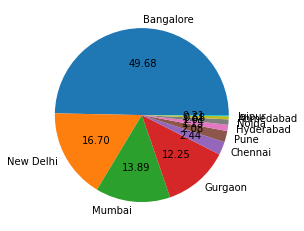

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
_data=pd.read_csv("C:\\Users\\lokes\\Downloads\\startup_funding.csv",skipinitialspace=True)



#_data.info()
_data.CityLocation.unique()
_data.CityLocation.replace("bangalore","Bangalore",inplace=True)
_data.CityLocation.replace("Delhi","New Delhi",inplace=True)
_data.CityLocation.replace("Pune / US","Pune",inplace=True)
_data.CityLocation.replace("New Delhi / US","New Delhi",inplace=True)

def change(num):
    a=type(num)
    new_num=""
    if a==str:
        for i in num:
            if i !=",":
                new_num+=i
        return int(float(new_num))
    return 0
_data.AmountInUSD=_data.AmountInUSD.apply(change)
_data["CityLocation"].dropna(inplace=True)
# def change_place(value):
#     return value.split("/")[0].strip()
# _data["CityLocation"]=_data["CityLocation"].apply(change_place)
d={}
for i in _data.values:
    d[i[5]]=d.get(i[5],0)+i[8]


l1=[i for i in d.keys()]
l2=[i for i in d.values()]
l3=l2.copy()
l3.sort()
l3.reverse()
l=[]
for i in l3:
    l.append(l2.index(i))
l=l
j=0
sum=0
l_name=[]
l_value=[]
for i in l:
    if type(l1[i]) !=float and j<10:
        sum+=l2[i]
        j+=1
        l_name.append(l1[i])
        l_value.append(l2[i])
for i in range(10):
    print(l_name[i],'{:.2f}'.format((l_value[i]/sum)*100))
plt.pie(l_value,labels=l_name,autopct="%.2f")
plt.show()

# Question 4 - Investment Type

## There are 4 different type of investments. Find out percentage of amount funded for each investment type.
## Plot a pie chart to visualise.
## Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

# Answer 4

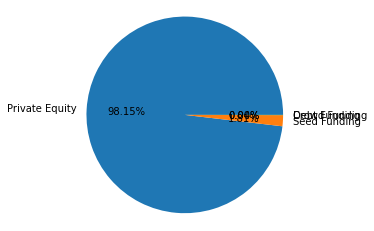

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_start=pd.read_csv("C:\\Users\\lokes\\Downloads\\startup_funding.csv",encoding='utf-8')
df_start['InvestmentType'].dropna(inplace=True)
# def separateCity(city):
#     return city.split('/')[0].strip()
# df_start['InvestmentType']=df_start['InvestmentType'].apply(separateCity)
df_start['InvestmentType'].replace("PrivateEquity","Private Equity",inplace=True)
df_start['InvestmentType'].replace("SeedFunding","Seed Funding",inplace=True)
df_start['InvestmentType'].replace("Crowd funding","Crowd Funding",inplace=True)

## Converting "AmountInUSD" into numeric format
df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])
city_amount=df_start.groupby('InvestmentType')['AmountInUSD'].sum().sort_values(ascending=False)[0:10]
city=city_amount.index
amountCity=city_amount.values
perAmount=np.true_divide(amountCity, amountCity.sum())*100
plt.pie(perAmount,labels = city , autopct = "%.2f%%")
plt.axis("equal")
plt.show()
for i in range(len(city)):
    print(city[i],format(perAmount[i],'.2f'))

 # Question 5 - Top Industries

## Which type of companies got more easily funding. To answer this question, find -
## Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
## Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

# Answer 5

In [14]:
import pandas as pd 
import numpy as np 
df_start=pd.read_csv("C:\\Users\\lokes\\Downloads\\startup_funding.csv",encoding='utf-8') 
df_start['IndustryVertical'].replace('eCommerce','Ecommerce',inplace=True) 
df_start['IndustryVertical'].replace('ECommerce','Ecommerce',inplace=True)
df_start['IndustryVertical'].replace('ecommerce','Ecommerce',inplace=True) 
## Converting "AmountInUSD" into numeric format 
df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x: float(str(x).replace(",",""))) 
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])
industry_amount=df_start.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending=False)[0:5] 
industry=industry_amount.index 
amountIndustry=industry_amount.values
perIndustry=np.true_divide(amountIndustry, amountIndustry.sum())*100 
for i in range(len(industry)): 
    print(industry[i],format(perIndustry[i],'.2f'))

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


# Question 6 - Top startups

## Find top 5 startups with most amount of total funding.
## Print the startup name in descending order with respect to amount of funding.

# Answer 6

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("C:\\Users\\lokes\\Downloads\\startup_funding.csv",skipinitialspace=True)
data.head()
data.StartupName.replace("Ola Cabs","Ola",inplace=True)
data.StartupName.replace("Olacabs","Ola",inplace=True)
data.StartupName.replace("Flipkart.com","Flipkart",inplace=True)
data.StartupName.replace("Oyo Rooms","Oyo",inplace=True)
data.StartupName.replace("OYO Rooms","Oyo",inplace=True)
data.StartupName.replace("Oyorooms","Oyo",inplace=True)
data.StartupName.replace("OyoRooms","Oyo",inplace=True)
data.StartupName.replace("Paytm Marketplace","Paytm",inplace=True)



def change(num):
    if type(num)==str:
        l=""
        for i in num:
            if i!=",":
                l+=i
        return int(float(l))
    else:
        return 0
data.AmountInUSD=data.AmountInUSD.apply(change)

data_start=data.groupby("StartupName")["AmountInUSD"].sum().sort_values(ascending=False)[0:10]
data_index=data_start.index
data_value=data_start.values
for i in range(5):
    print(data_index[i])

Paytm
Flipkart
Ola
Snapdeal
Oyo


# Question 7 - Funding rounds

## Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.
## Print the startup name in descending order with respect to the number of funding round as integer value.

# Answer 7

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("C:\\Users\\lokes\\Downloads\\startup_funding.csv",skipinitialspace=True)
data.head()
data.StartupName.replace("Ola Cabs","Ola",inplace=True)
data.StartupName.replace("Olacabs","Ola",inplace=True)
data.StartupName.replace("Flipkart.com","Flipkart",inplace=True)
data.StartupName.replace("Oyo Rooms","Oyo",inplace=True)
data.StartupName.replace("OYO Rooms","Oyo",inplace=True)
data.StartupName.replace("Oyorooms","Oyo",inplace=True)
data.StartupName.replace("OyoRooms","Oyo",inplace=True)
data.StartupName.replace("Paytm Marketplace","Paytm",inplace=True)


def change(num):
    if type(num)==str:
        l=""
        for i in num:
            if i!=",":
                l+=i
        return int(float(l))
    else:
        return 0
data.StartupName.value_counts()
data_name=data.StartupName.value_counts().index[0:5]
data_l=data.StartupName.value_counts().values[0:5]
for i in range(5):
    print(data_name[i],data_l[i])

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


# Question 8 - Top Investor

## Find the Investors who have invested maximum number of times.
## Print the investor name and number of times invested as integer value.

# Answer 8

In [18]:
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as ply
data=pd.read_csv("C:\\Users\\lokes\\Downloads\\startup_funding.csv")
df=data.copy()
df.InvestorsName.fillna("",inplace=True)
l=df["InvestorsName"].str.split(',')
# l=list(l)
investor={}
for i in l.values:
    for j in i:
        temp = j.strip()
        if temp in investor:
            investor[temp]+=1
        else:
            investor[temp]=1

investor=dict(sorted(investor.items(),key=operator.itemgetter(1),reverse=True))
for i in investor:
    if i=="" :
        continue
    print(i,investor[i])
    break

Sequoia Capital 64
